# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Importing the dataset

In [3]:
df = pd.read_csv('Data heart.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Visualization

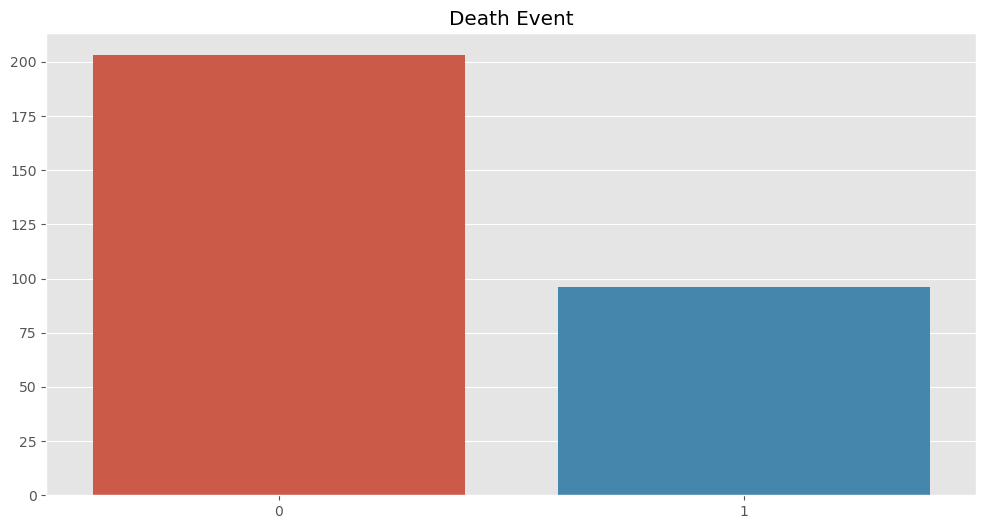

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT')
plt.title('Death Event')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [6]:
df.DEATH_EVENT.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

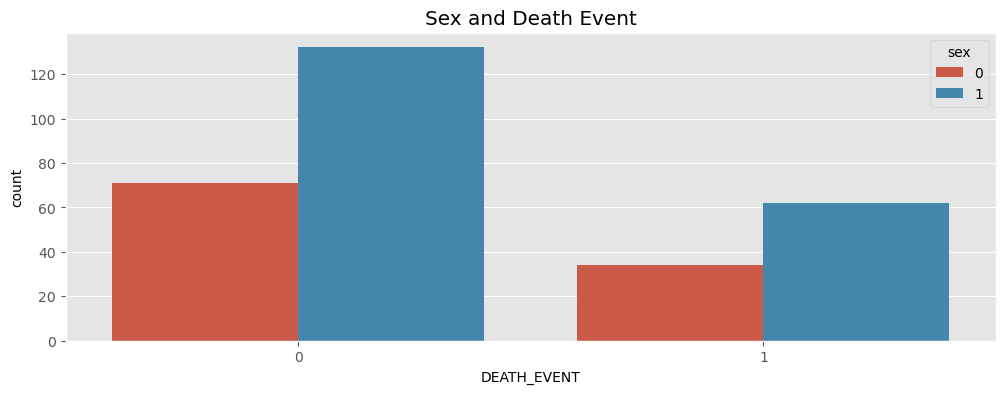

In [7]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='DEATH_EVENT', hue='sex')
plt.title('Sex and Death Event')
plt.show()

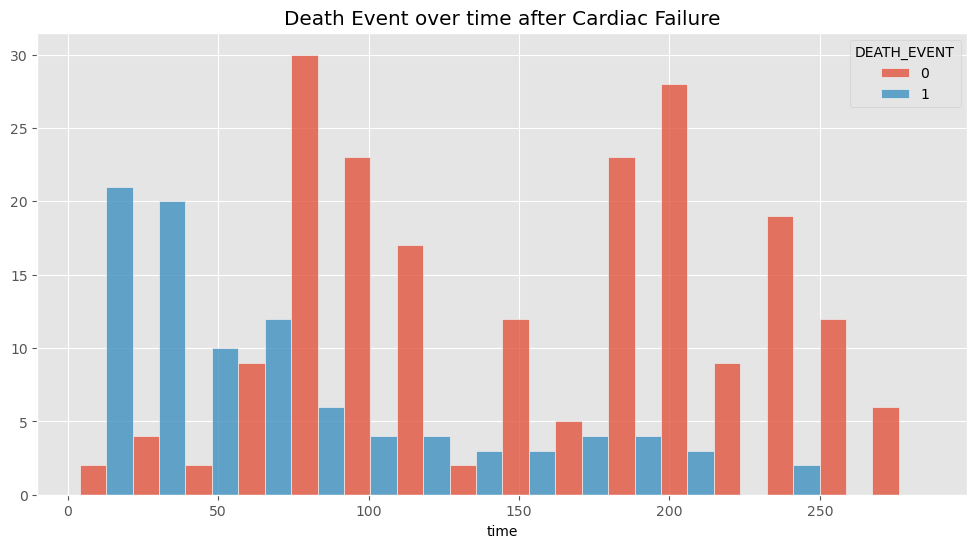

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='time', hue='DEATH_EVENT', bins=16, multiple='dodge')
plt.title('Death Event over time after Cardiac Failure')
plt.ylabel(None)
plt.show()

We can see that the risk of death is really high in the two months after the heart failure, after that, the patients have higher chance of survival

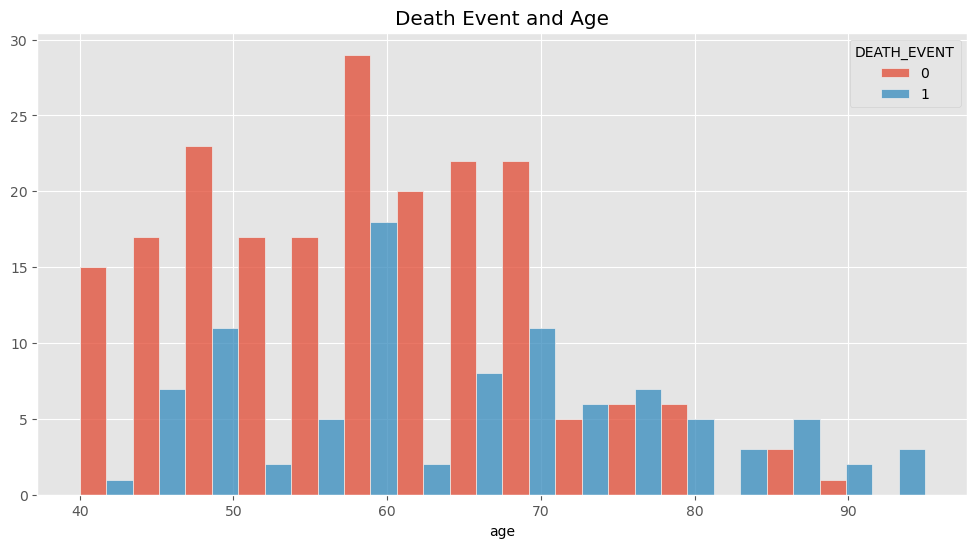

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='dodge', bins=16)
plt.title('Death Event and Age')
plt.ylabel(None)
plt.show()

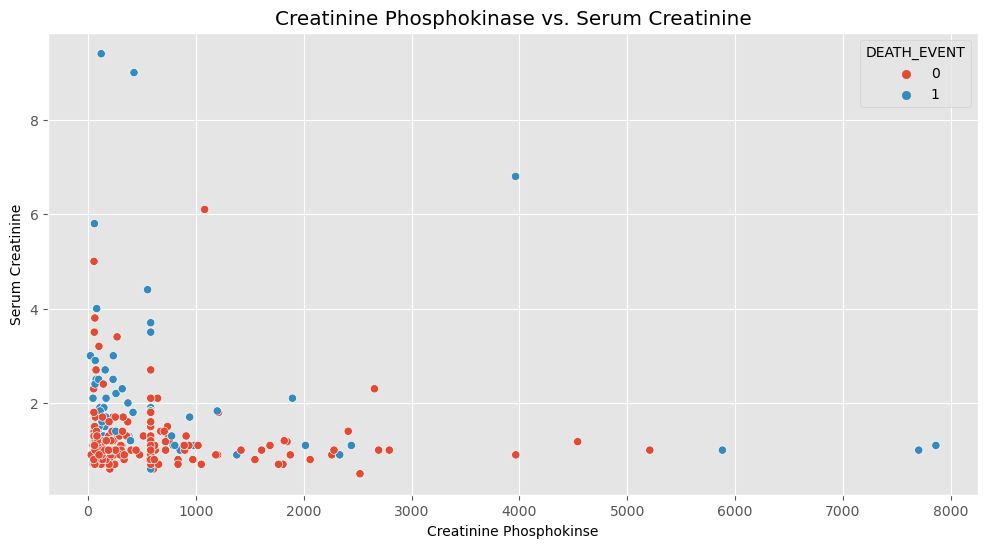

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='creatinine_phosphokinase', y='serum_creatinine', hue='DEATH_EVENT')
plt.title('Creatinine Phosphokinase vs. Serum Creatinine')
plt.xlabel('Creatinine Phosphokinse')
plt.ylabel('Serum Creatinine')
plt.show()

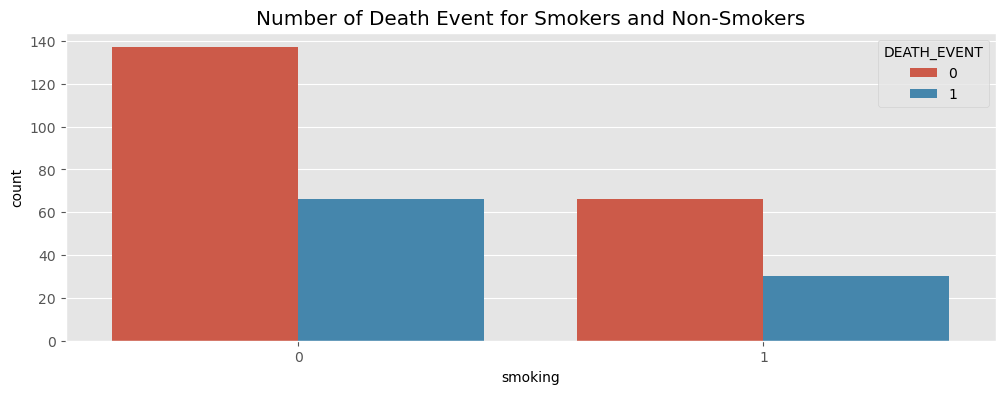

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')
plt.title('Number of Death Event for Smokers and Non-Smokers')
plt.show()

# Building a Simple Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [13]:
y = df['DEATH_EVENT'].copy()
X = df.drop('DEATH_EVENT', axis=1)

# Splitting the dataset into the Training set and Test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_test)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
281  70.0        0                       582         0                 40   
265  50.0        1                       298         0                 35   
164  45.0        0                      2442         1                 30   
9    80.0        1                       123         0                 35   
77   42.0        0                       102         1                 40   
278  50.0        1                      1051         1                 30   
93   60.0        1                       154         0                 25   
109  45.0        0                       292         1                 35   
5    90.0        1                        47         0                 40   
173  50.0        1                       115         0                 20   
97   70.0        1                        59         0                 60   
195  77.0        1                       418         0                 45   

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(239, 12) (239,)
(60, 12) (60,)


# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'the accuracy for the logistic regression is {round(acc, 3)}')

the accuracy for the logistic regression is 0.8


# Making the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34  1]
 [11 14]]


#Predicting a new result

In [22]:

new_pred = model.predict(sc.transform([[56.0,1,63,1,60,1,368000.00,0.80,135,1,1,22]]))
print(new_pred)

[0]


C:\Users\NIKIL SAINI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
